In [ ]:
# TODO: initialize all necessary packages

# Regression Modelling

In this section, we first create load the train experiments that were create inthe PCA script and save in the file "Experiment_Train_Set.mat". 
These experimental data will be used to create a MLR model to predict final titer, which will serve as term of comparison for the PLS model trained below.

# Initial Conditions model


In [ ]:
# TODO: load dataset Experiments_TrainSet

## Multiple Linear Regression 

We first train (fit) a quadratic MLR model to the final titer, using the data loaded above.
We then characterize the performance of the model using ANOVA, where the user can have information about the importance of each coefficient and of the overal model.

### Create linear model using stepwise procedure

In [ ]:
# TODO: create stepwiselm model and visualize model summary

### Evaluate model prediction on train set
In this section, we check the predictions of the models versus the training data for the final titer.


In [ ]:
mdl = stepwiselm(DoE_nondim,f_DoE,'quadratic');
anova_table = anova(mdl)
f_DoE_pred = predict(mdl,DoE_nondim);
figure, clf, hold on
plot(f_DoE,f_DoE_pred,'bo','LineWidth',1)
plot([0,1600],[0,1600],'k--')
grid on, box on
title('Predicted vs Measured Values for Final Titer (Train)','FontSize',16)
xlabel('Measured Values','FontSize',14)
ylabel('Predicted Values','FontSize',14)

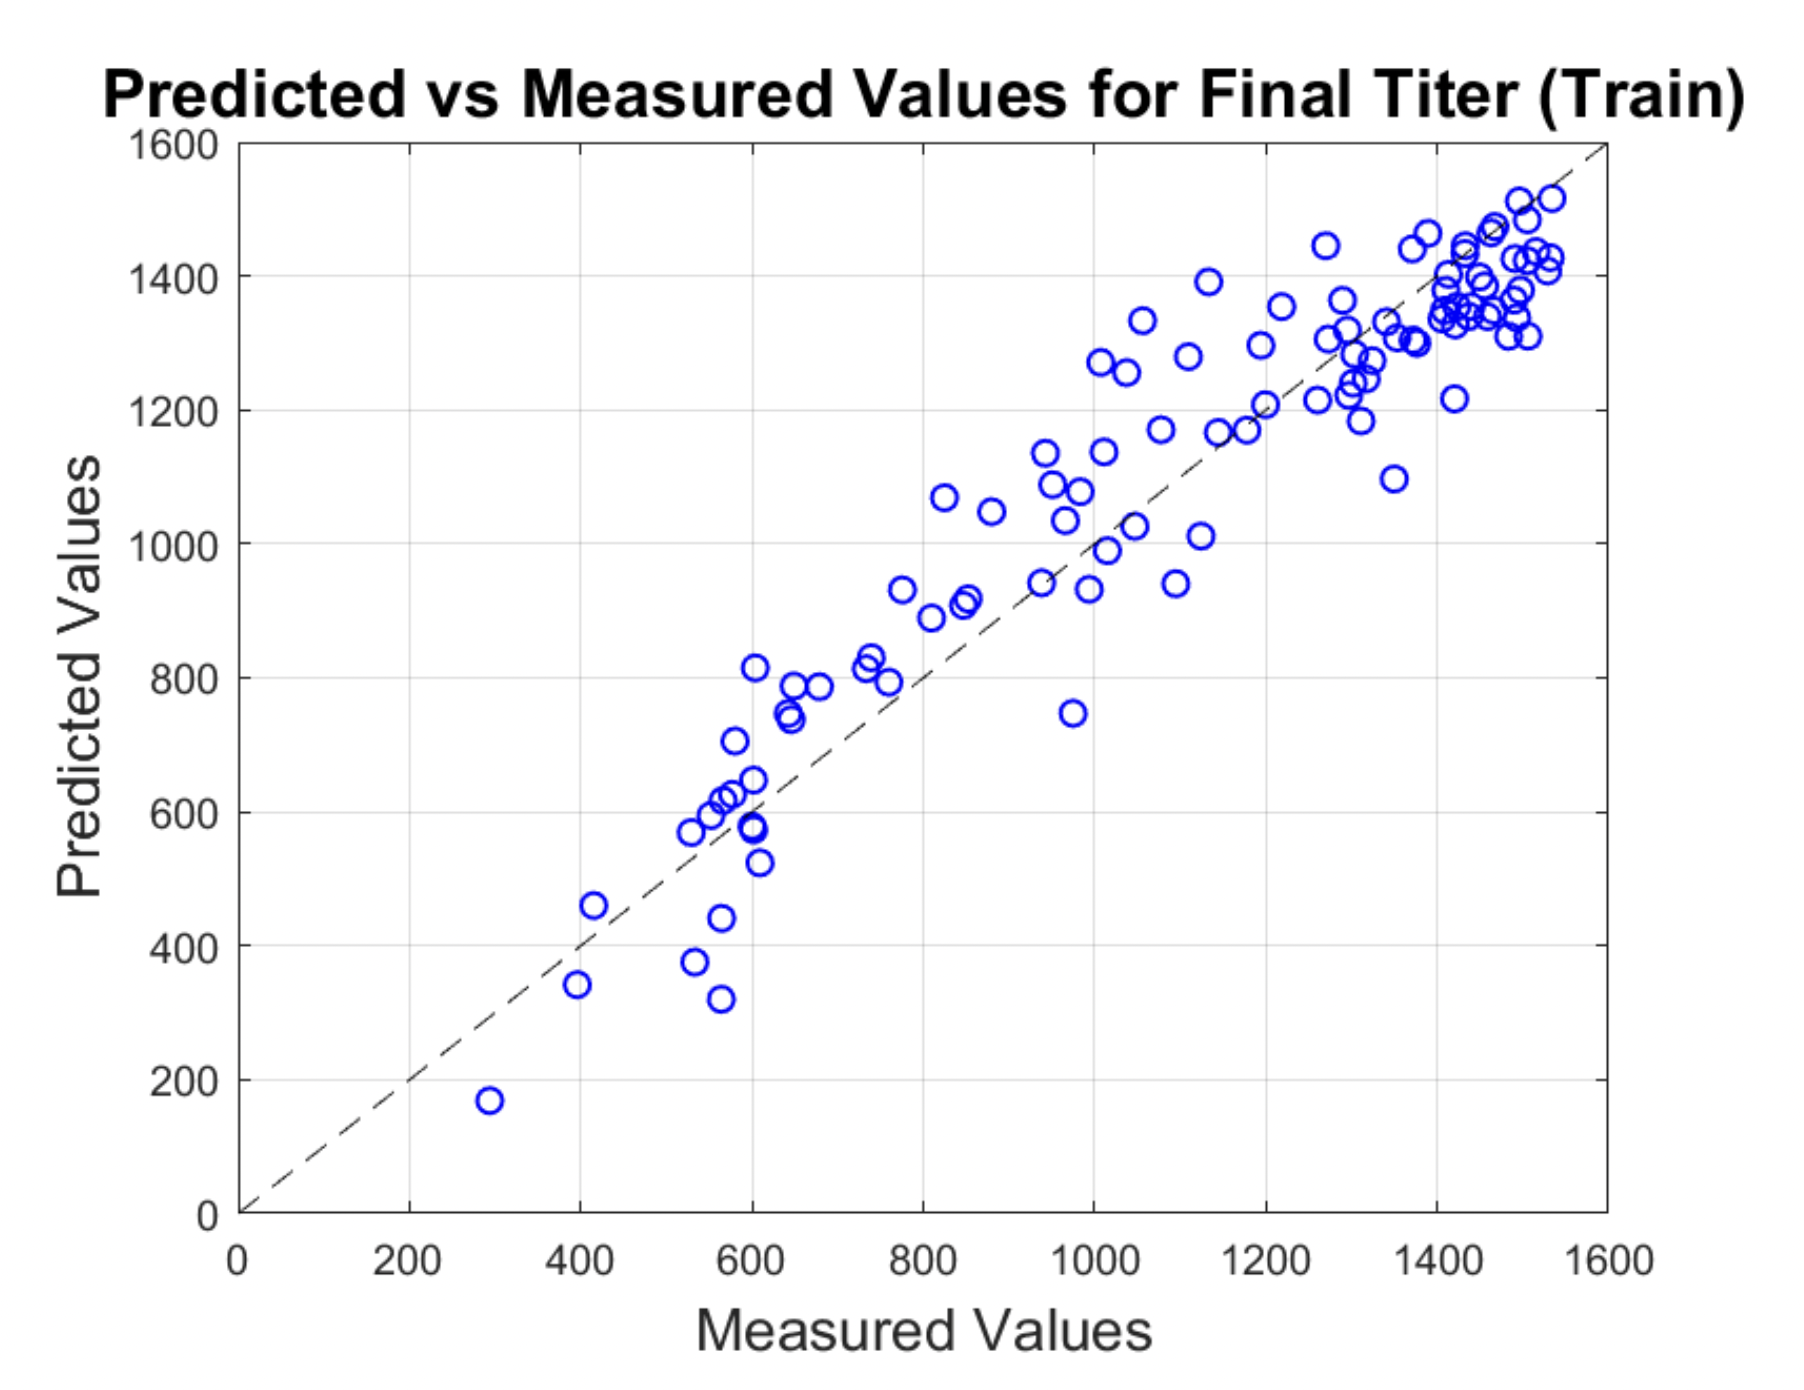

### Evaluate model prediction on test set

In this section, we use the trained model to predict the final titer and we test it on the test set created in the script "00_Process_Characterization.ipynb".


In [ ]:
# TODO: plot observed vs predicted plot and calculate abs/rel RMSE

## PLS Model

In this section, we train a PLS1 model with the data loaded in the section above.


### Select number of latent variables

Create a PLS model to predict the value of the final titer given the initial conditions.

* Input matrix: "DoE_nondim". This corresponds to the non-dimensional values of the manipulated variables for each experiment.
* Output target: "f_DoE". This corresponds to the final value of titer at the end of each experiment.

Select the number of latent variables for the model (the maximum number of latent variables is 5, equal to the number of variables in the input matrix).


```
# This is formatted as code
```




In [ ]:
# Number of latent variables
N_LV = 3

### Train the PLS model

Here we train the PLS1 model with final titer as our response

In [ ]:
# TODO: train PLS1 mdoel

### Plot variance explained in the Y

In [ ]:
# TODO: explained variance plot

### Evaluate model on train/test set


In [ ]:
# TODO: plot observed vs predicted experiments and calculate abs/rel RSME

### Check model diagnostics

* plot fitted response residuals
* plot T2 / Mahalanobis distance values

In [ ]:
# TODO: compute fitted response residuals and mahalanobis distance plots for experiments


### Plot scores and loadings for the predictors


In [ ]:
# TODO: bi-plot / scores plot / loadings plot
# Color by exp name / FINAL TITER

### Plot VIP scores

In [ ]:
# TODO: plot VIP scores

### Task: What number of latent variables produces best model?

## Simulate Cross Validation

In this section, we will simulate a typical cross- validation to define the optimal number of latent variables.


### Select number of folds
First define the number of folds.


In [ ]:
# Number of folds
N_folds = 5

### Compute cross validation

Nfold PLS1 models are trained using (Nfolds-1) folds. For each model, the sum of squared residuals (SSR) is calculated and summed up.

This is repeated for different numbers of latent variables. The number of latent variables returning the least value of the SSRs is chosen as optimal.
A second criterion is selected, namely the Bayesian Information Criterion (BIC), which is weighting the effect of the number of latent variables, i.e., if two values of the number of latent variables are returning a similar value of the SSR, then the one using less variables is chosen to be more likely to produce robust predictions.:

In [ ]:
# TODO: wrap PLS in cross-validation

### Evaluate model in cross-validation


In [ ]:
# TODO: RMSE_CV, RMSE_BIC

# Historical PLS Model

In an so-called historical model, the data from different experiments are ordered into a batch-wise unfolded (BWU) matrix (i.e., every row corresponds to an experiment).

The BWU can be used to compute final properties of the experiment, like CQAs, which are typically the effect of the cumulated effect of the experiment profile.

In this example, we will use the BWU matrix to predict the final value of titer. Clearly, titer information are removed from the BWU matrix.

In [ ]:
# Define number of days to include
N_days = 13
# Define number of latent variables
N_LV = 5

### Create BWU matrix

Here the BWU matrix is created. The vaues of the manipulated variables are added as columns at the beginning of the matrix.

* Remove titer
* Remove exceeding days
* Eliminate invariant columns
* Remove linearly dependent columns
* Create a PLS model from the initial design to the final titer


In [ ]:
# TODO: code steps above

### Train Historical PLS model

In [ ]:
# TODO: train PLS on modified BWU

### Evaluate model on train/test set

In [ ]:
# TODO: plot obs vs predicted, compute abs/rel rmse

### Plot scores, loadings and VIP

In [ ]:
# TODO: plot bi-plot / scores / loadings / VIP values

### Task: Check model diagnostics

In [ ]:
# TODO: Residuals, mahalanobis distances

# Solutions to tasks

# Main Focus
* RMS model buildup
* Model comparison